In [39]:
library(ggplot2)
library(reshape2)

In [22]:
head(economics_long)

date,variable,value,value01
1967-07-01,pce,507.4,0.0000000000
1967-08-01,pce,510.5,0.0002660008
1967-09-01,pce,516.3,0.0007636797
1967-10-01,pce,512.9,0.0004719369
1967-11-01,pce,518.1,0.0009181318
1967-12-01,pce,525.8,0.0015788435


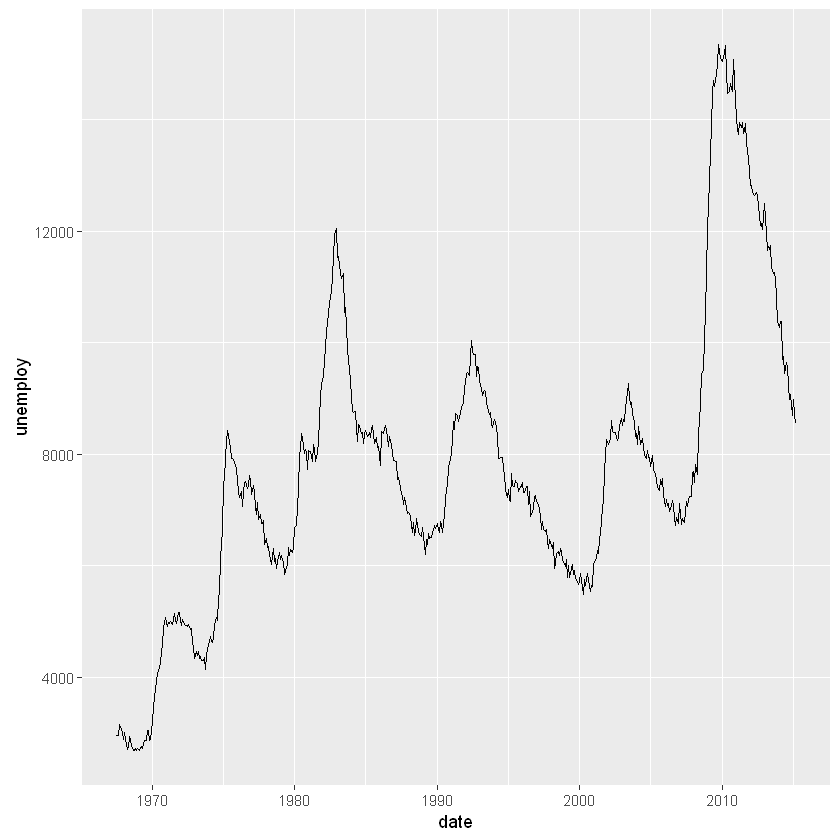

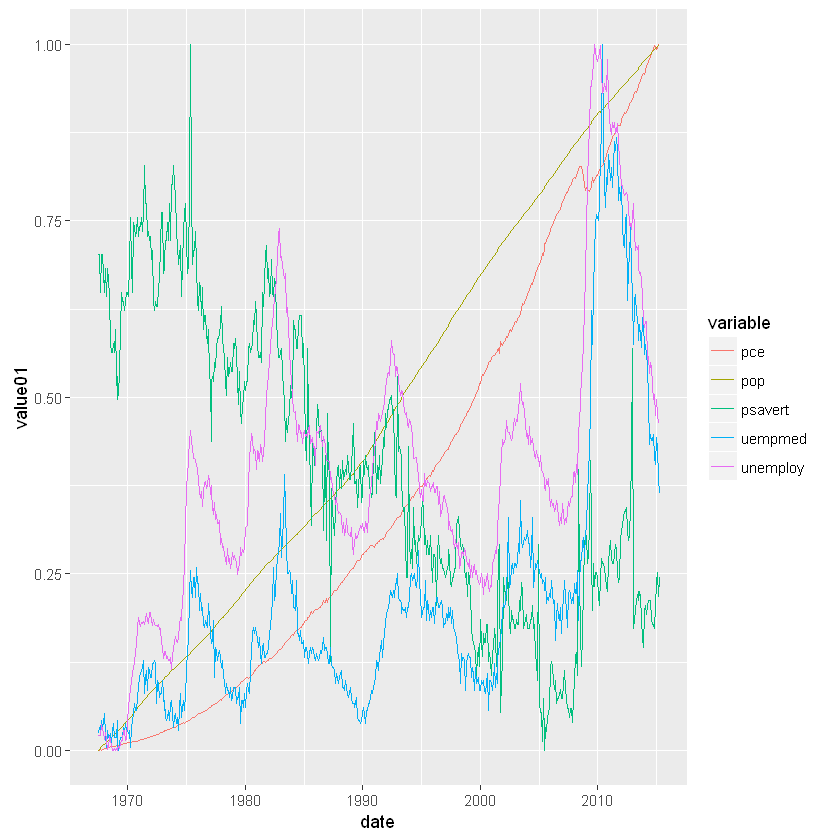

In [3]:
# geom_line() is suitable for time series
ggplot(economics, aes(date, unemploy)) + geom_line()
ggplot(economics_long, aes(date, value01, colour = variable)) +
  geom_line()


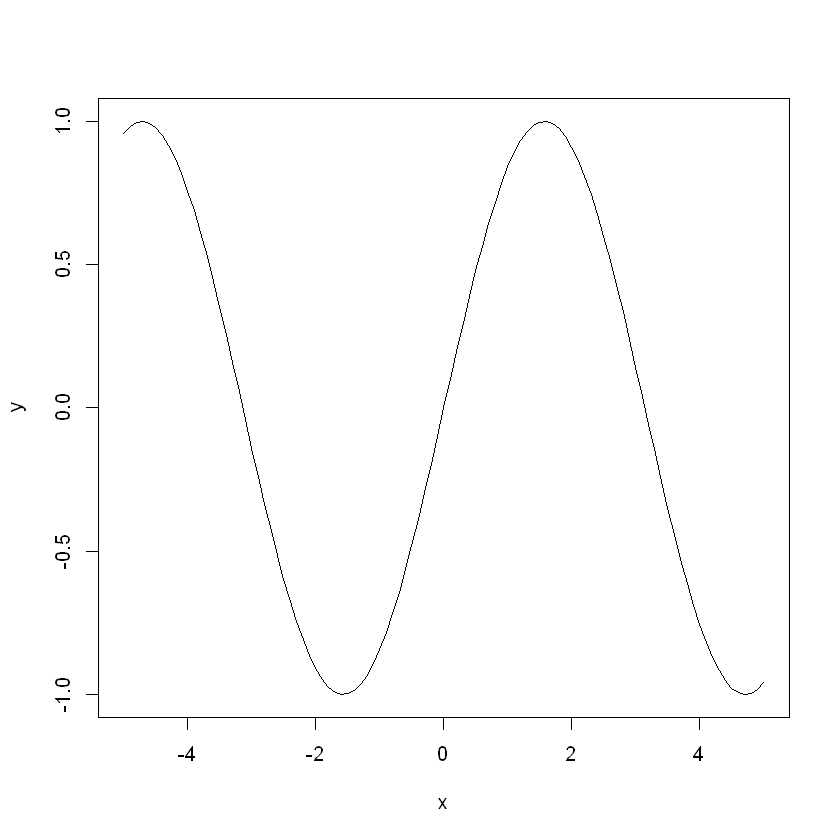

In [16]:
x <- seq(-5,5,0.1)
y <- sin(x)

plot(x,y,type="l")

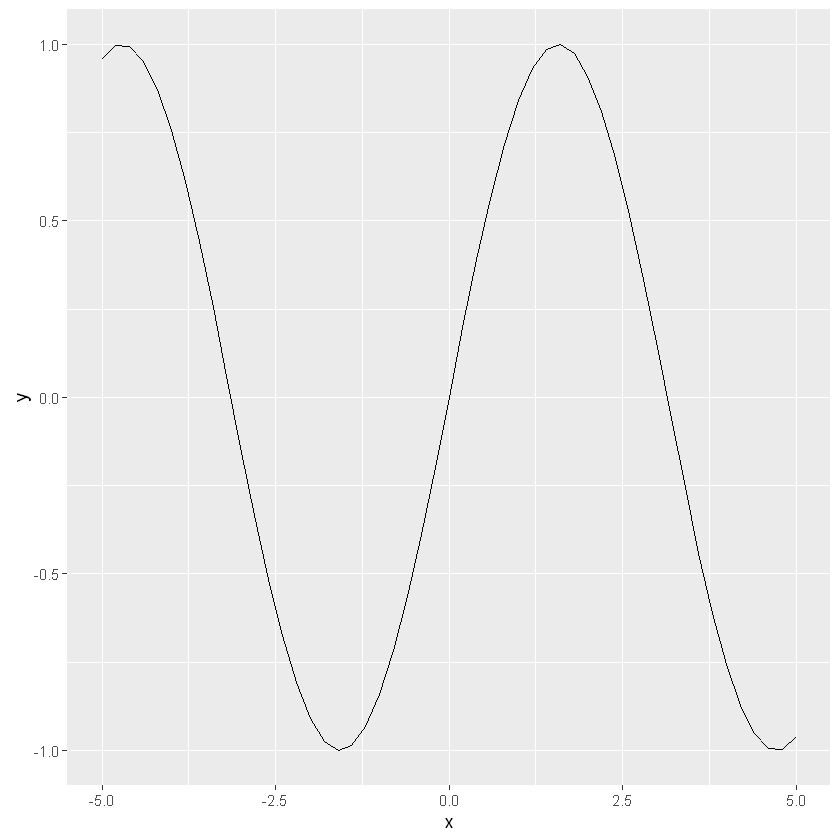

In [14]:
ggplot(data=NULL,aes(x,y)) +geom_line()

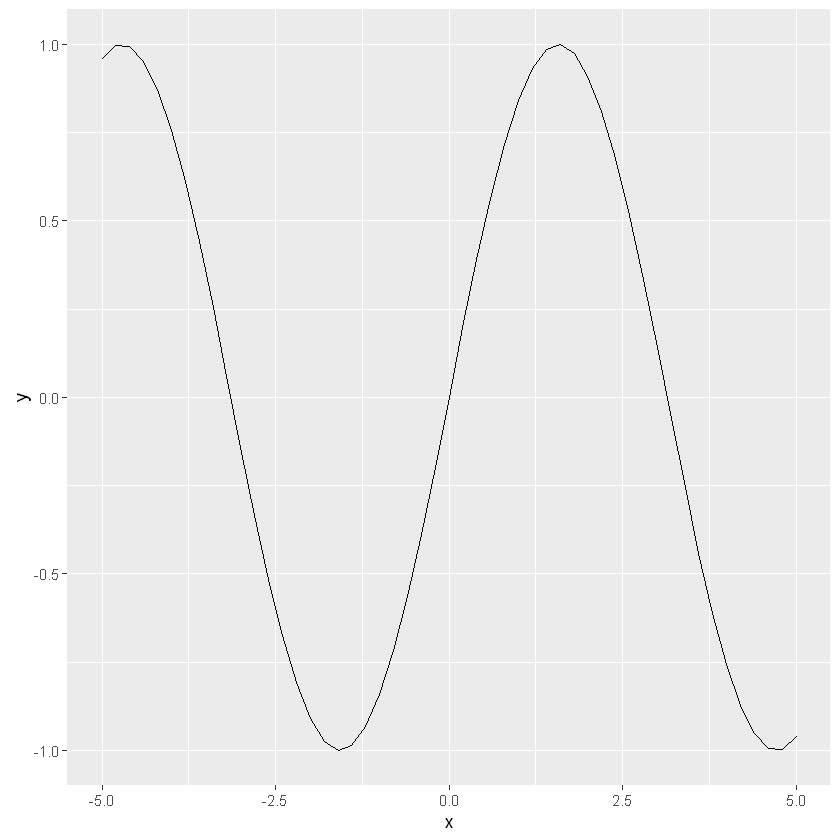

In [15]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="round")

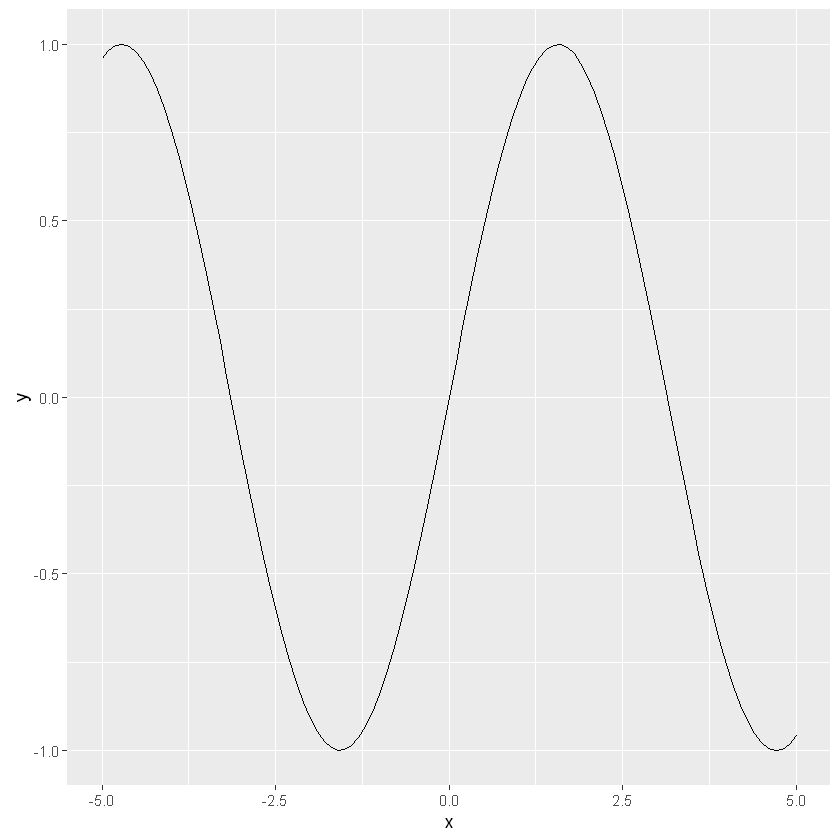

In [8]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="butt")

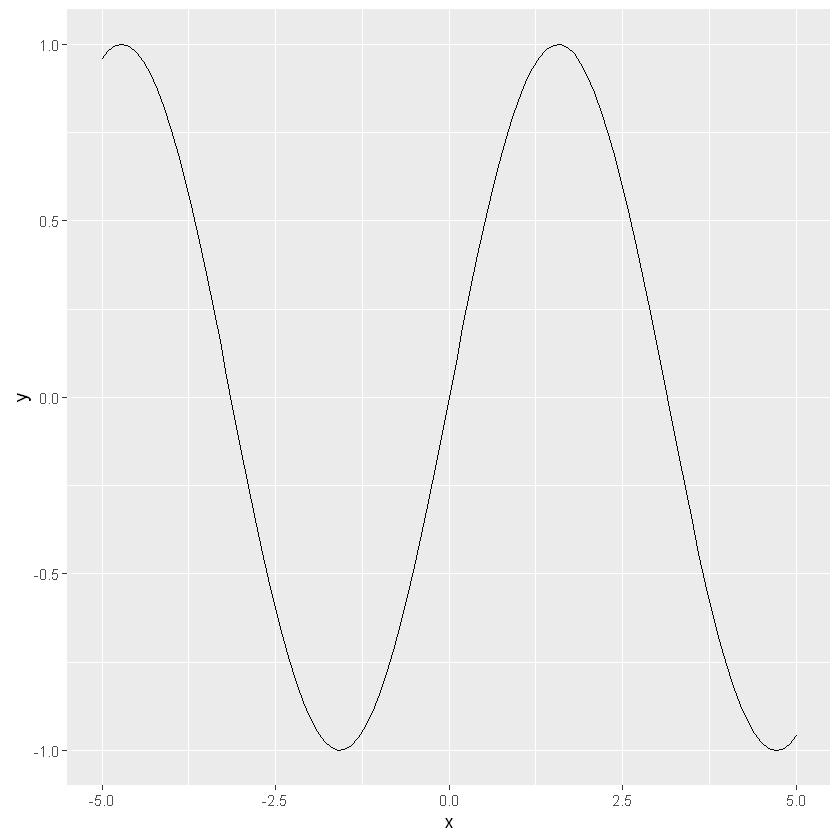

In [9]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="square")

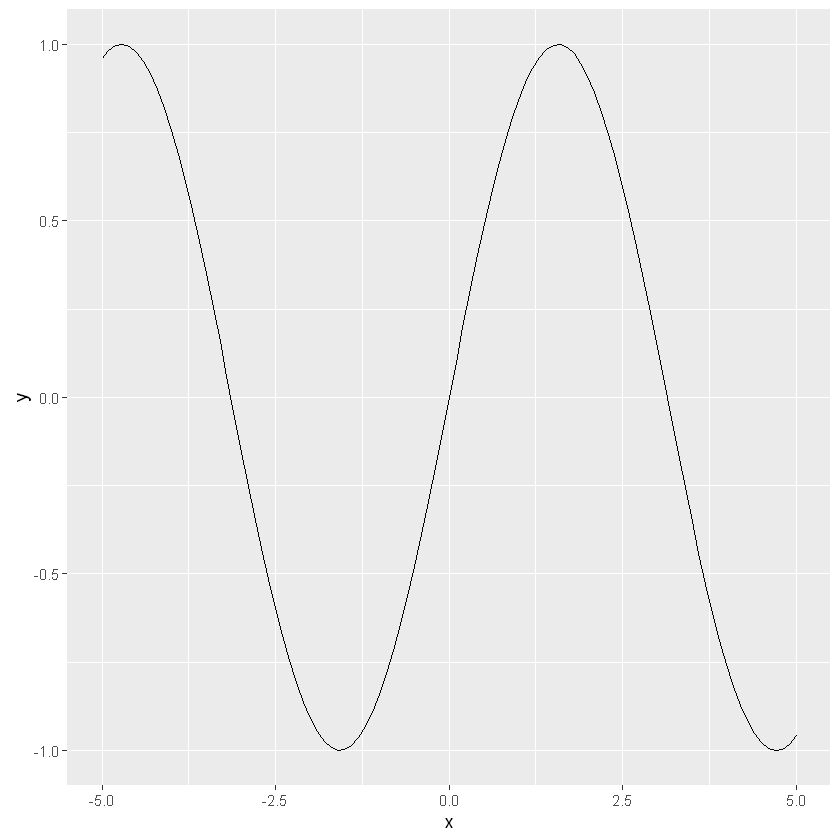

In [10]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="round")

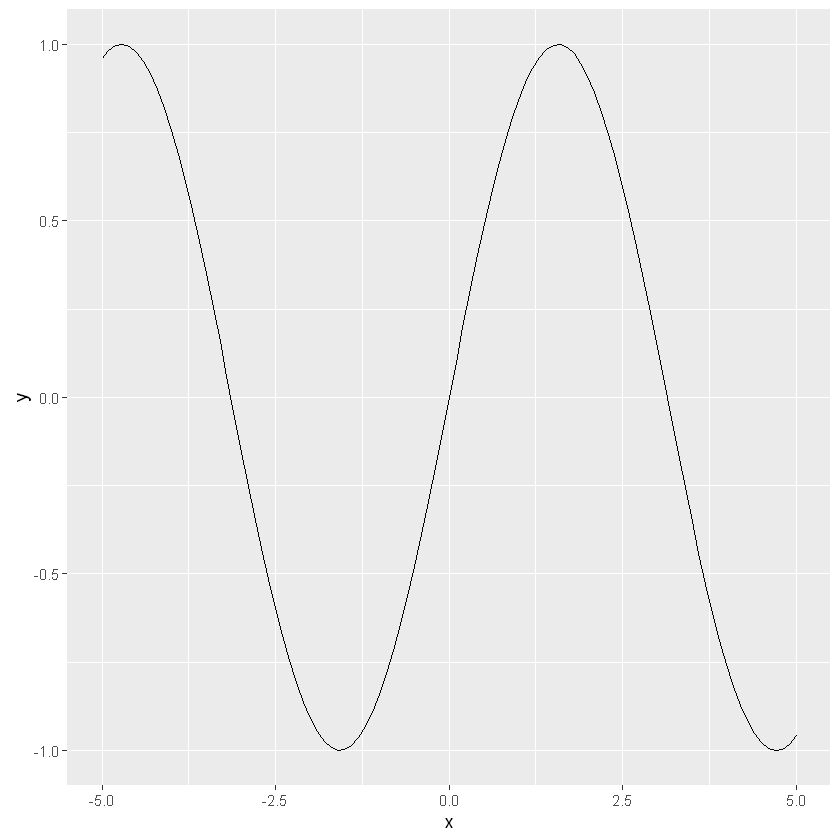

In [11]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="mitre")

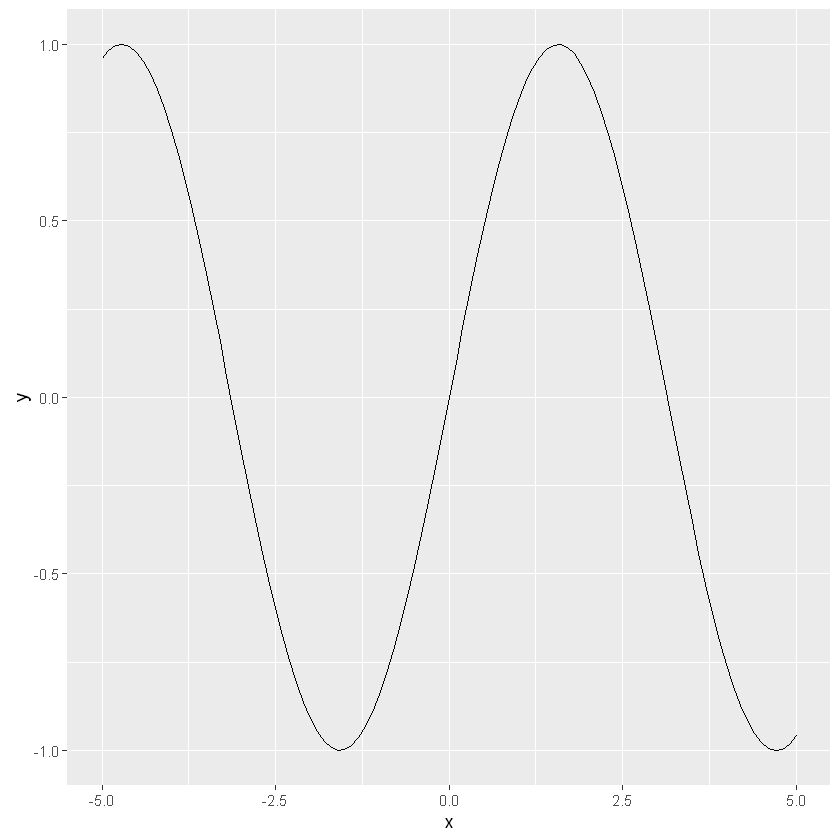

In [12]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="bevel")

In [17]:
power.binom <- function(x,n=10,x0=0,var=1,alpha=0.05){
    
    p0 <- pnorm(x0,x0,var,lower.tail=FALSE)
    left <- qbinom(alpha/2,n,p0)
    right <- qbinom(alpha/2,n,p0,lower.tail=FALSE)
    prob <- pnorm(x0,x,var)
    power <- pbinom(left-1,n,prob) + pbinom(right+1,n,prob,lower.tail=FALSE)
    return(power)
}

In [18]:
power.norm <- function(x,n=10,x0=0,var=1,alpha=0.05){
    left <- qnorm(alpha/2,x0,var/n)
    right <- qnorm(alpha/2,x0,var/n,lower.tail=FALSE)
    power <- pnorm(left,x,var/n) + pnorm(right,x,var/n,lower.tail=FALSE)
    return(power)
}

In [31]:
x <- seq(-0.5,0.5,0.01)
pb <- power.binom(x,n=100)
pn <- power.norm(x)

df = data.frame(x=x,pb=pb,pn=pn)

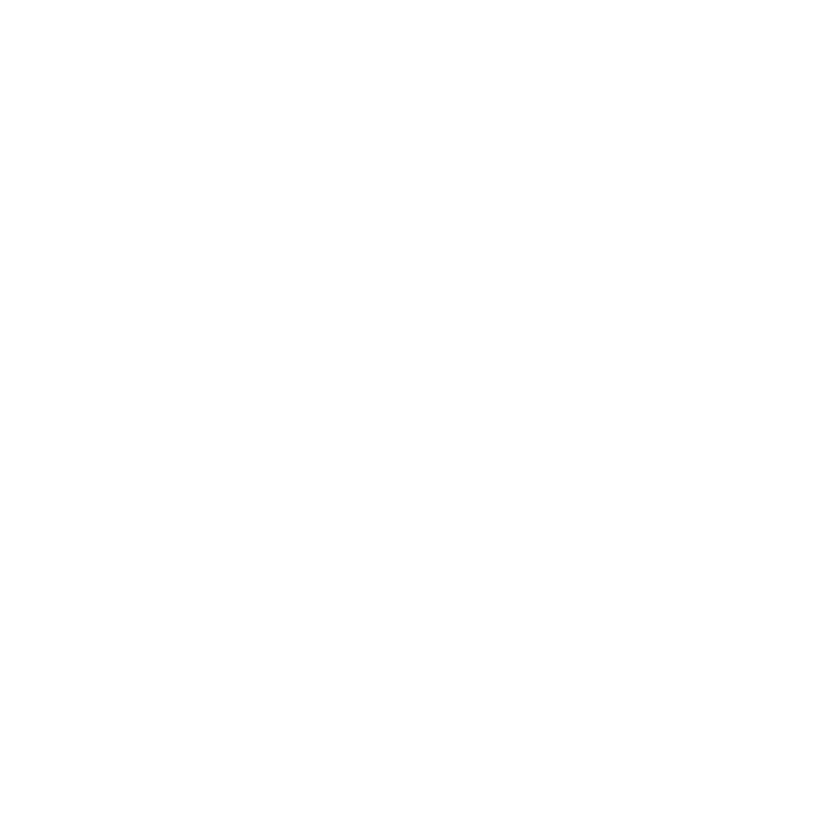

In [32]:
ggplot(data=df,aes(x)) + geom_line(aes(y = pb,colour="pb")) + geom_line(aes(y = pn),colour="pn")

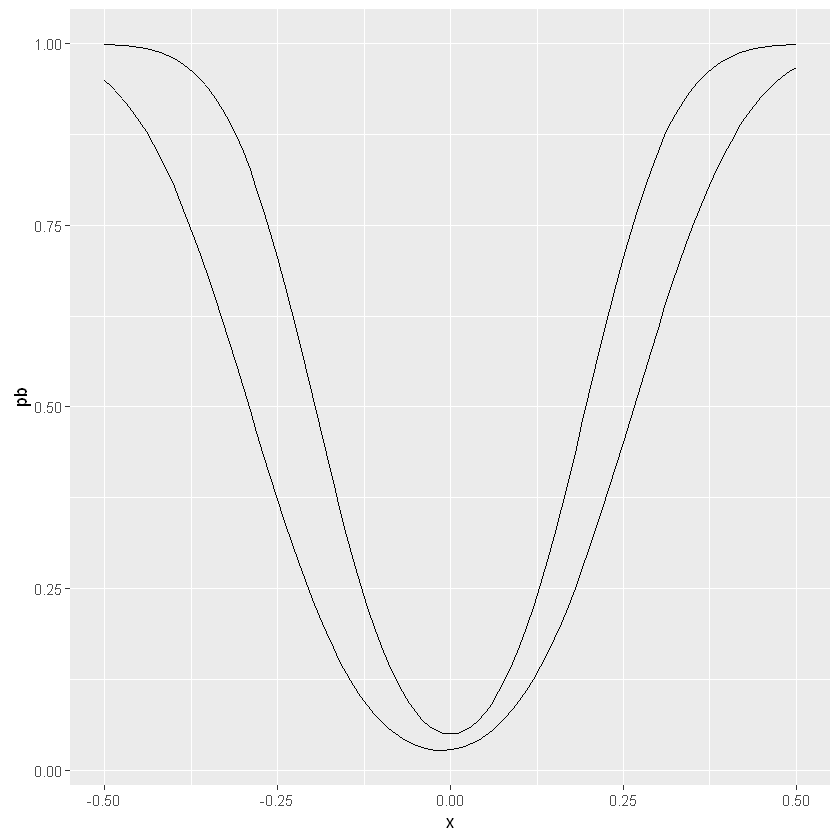

In [34]:
ggplot(data = df,aes(x)) + geom_line(aes(y=pb)) + geom_line(aes(y = pn)) + scale_colour_hue("variable")

In [36]:
head(df)

x,pb,pn
-0.50,0.9489940,0.9988173
-0.49,0.9402876,0.9983591
-0.48,0.9304521,0.9977446
-0.47,0.9194078,0.9969284
-0.46,0.9070809,0.9958551
-0.45,0.8934052,0.9944579


In [41]:
head(melt(df,id="x",measure=c("pb","pn")))

x,variable,value
-0.50,pb,0.9489940
-0.49,pb,0.9402876
-0.48,pb,0.9304521
-0.47,pb,0.9194078
-0.46,pb,0.9070809
-0.45,pb,0.8934052


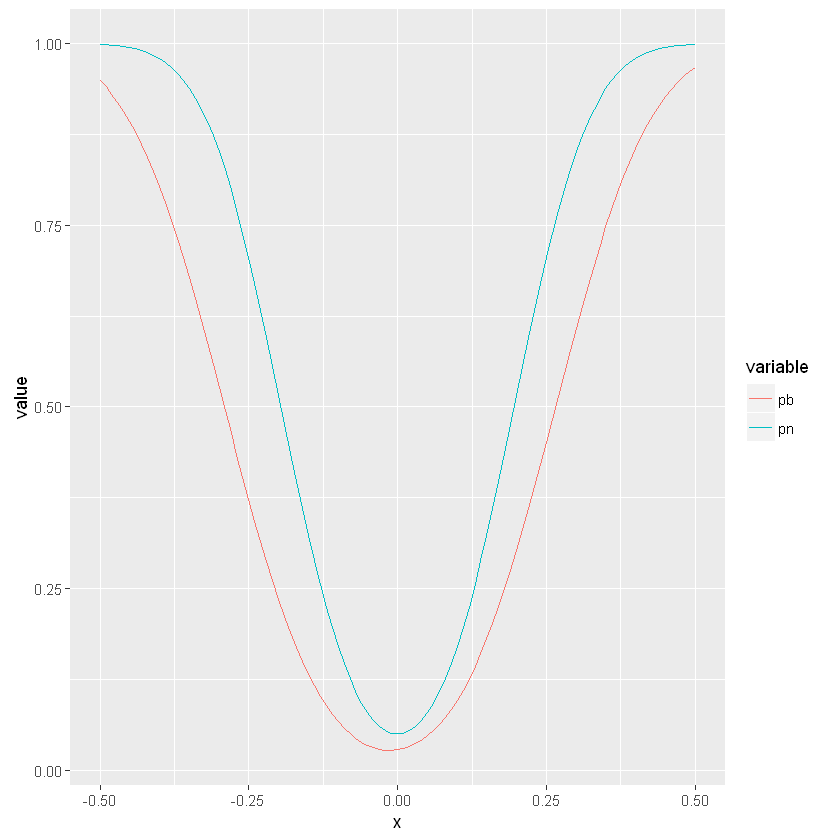

In [42]:
ggplot(data=melt(df,id="x",measure=c("pb","pn")),aes(x,value,colour = variable)) + geom_line()

In [50]:
x <- seq(-0.5,0.5,0.01)
pb50 <- power.binom(x,n=50)
pb100 <- power.binom(x,n=100)
pb200 <- power.binom(x,n=200)
pn <- power.norm(x)

df = data.frame(x=x,pn=pn,pb50=pb50,pb100=pb100,pb200=pb200)



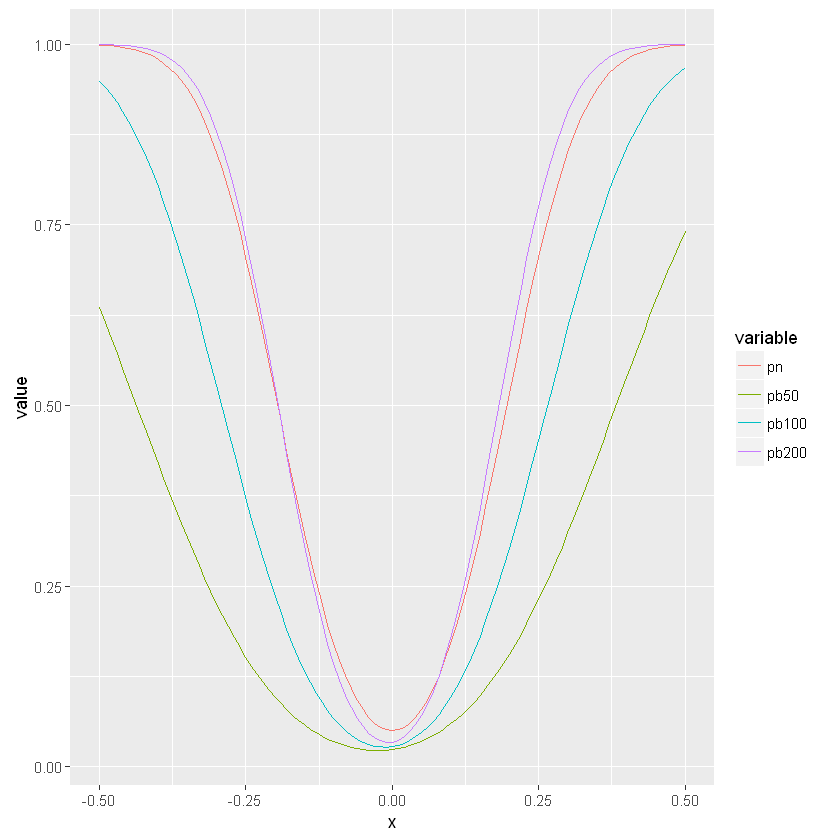

In [51]:
base <- ggplot(data=melt(df,id="x",measure=names(df)[names(df)!='x']),aes(x,value,colour = variable)) 
base + geom_line()

[1] "pb"    "pb50"  "pb100" "pb200"

In [53]:
dbinom(0:10,10,0.5)

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

In [54]:
qbinom(0.025,10,0.5)

[1] 2

In [55]:
qbinom(0.025,10,0.5,lower.tail=FALSE)

[1] 8

In [56]:
dbinom(0:10,10,0.5)[2]

[1] 0.009765625

In [57]:
dbinom(0:10,10,0.5)[8]

[1] 0.1171875

In [59]:
?qbinom